# Selenium vs Scrapy vs BeatifulSoup
**Selenium**
- Browser Automation library
- Used to automate task that we may do as humans on a website (clicking header, scrolling mouse etc)
- Great for scraping dynamic websites
- Downside : limited datasize compared to scrapy
- Can do instagram bots

**Scrapy**
- complete webscraping framework
- build a complete spider to crawl through entire website
- can combine with selenium to automate clicking and scrolling etc
- more suited for advanced users

**BeutifulSoup**
- parsing library
- not a complete webscraping library
- only does parsing (and saving output)
- very good for small projects, beginner friendly
- downside : slow and can have a few dependencies

In [3]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException


In [4]:
# Set up Chrome options
chrome_options = Options()
chrome_options.page_load_strategy = 'normal'

In [ ]:
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
try:
    driver.get(page_url)
except TimeoutException:
    print("The page took too long to load!")

# Find Books

In [7]:
book_categories = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [8]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [9]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [10]:
character_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [11]:
character_elems[0].text

'Category:Baptism of Fire characters'

In [12]:
# Make a for loop to repeat above outputs

# Set up the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)
#driver.set_page_load_timeout(30)

# Go to the page url
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
try:
    driver.get(page_url)
except TimeoutException:
    print("The page took too long to load!")

time.sleep(3)

# Find Books
book_categories = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name':book_name,
                 'url':book_url})

In [13]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [14]:
character_list = []
for book in books:
    # go to book page
    driver.get(book['url'])
    character_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

    for elem in character_elems:
        character_list.append({'book':book['book_name'],'character':elem.text})

In [15]:
df = pd.DataFrame(character_list)
df.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

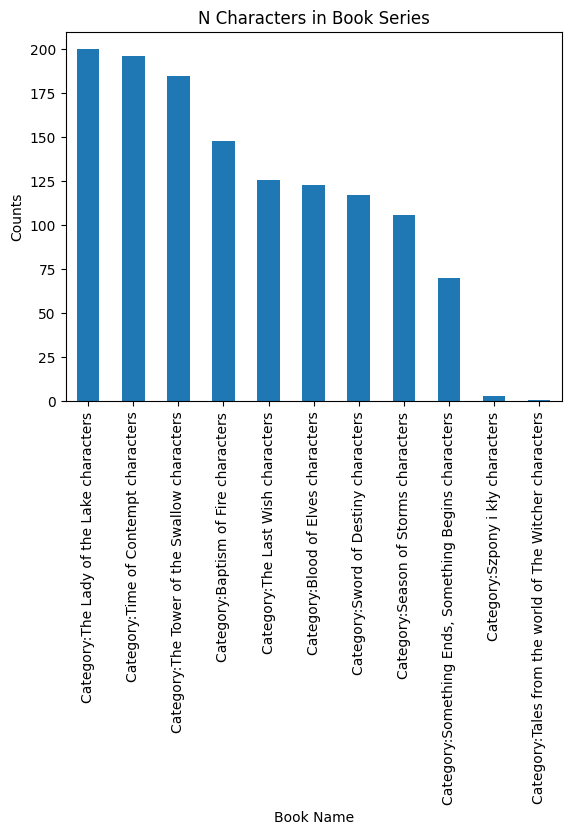

In [17]:
df['book'].value_counts().plot(kind='bar',xlabel='Book Name',
                              ylabel='Counts',title='N Characters in Book Series')
plt.show()

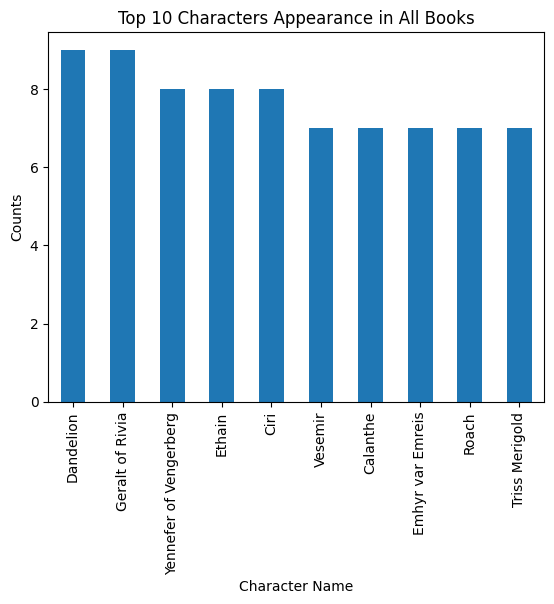

In [18]:
df['character'].value_counts().head(10).plot(kind='bar',xlabel='Character Name',
                              ylabel='Counts',title='Top 10 Characters Appearance in All Books')
plt.show()